In [33]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Introduction

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. 
SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high-rate spreads throughout the world. 
Currently (on the date 13 Jan 2021), this leads to a total of over 1.9M Deaths across the globe. Pandemic is spreading all over the world; it becomes more important to understand about this spread.

# Data

The dataset used in research is published worldometers website, which can be accessed using the link below:
https://www.worldometers.info/coronavirus/
This dataset is an effort to summarise relevant data associated with confirmed, death, recovered cases, and number of tests performed across different geographic regions to date, to provide some insight to the pandemic situation over the world.

# Hypothesis Testing:

The number of testing performed per million population by different countries are divided into three groups: High Level Testing, Medium Level Testing, and Low Level Testing. 
Null Hypothesis: The level of testing is NOT associated with the number of confirmed cases per million population. Therefore, the mean difference in the total number of confirmed cases per million population amongst those three groups is zero.
ANOVA analysis will be performed amongst those three different level testing groups against the total number of confirmed cases per million population, to determine if the hypothesis is true or not.



In [34]:
# Read in our data
covid_df = pd.read_csv('WorldMeter13_Jan_20201A.csv')

# Get to know the data a bit
covid_df.info()
covid_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       202 non-null    object
 1   Country, Other          202 non-null    object
 2   Total Cases             202 non-null    object
 3   New Cases               120 non-null    object
 4   Total Deaths            188 non-null    object
 5   New Deaths              87 non-null     object
 6   Total Recovered         199 non-null    object
 7   Active Cases            199 non-null    object
 8   Serious, Critical       145 non-null    object
 9   Total Cases per 1M pop  202 non-null    object
 10  Deaths per 1M pop       188 non-null    object
 11  Total Tests             201 non-null    object
 12  Tests per 1M pop        201 non-null    object
 13  Population              201 non-null    object
dtypes: object(14)
memory usage: 22.3+ KB


,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,81,Bahrain,"96,195",NaN,356,NaN,"92,920","2,919",20,"55,523",205,"24,866,420","14,352,829","1,732,510"
1,186,Faeroe Islands,647,1,1,NaN,619,27,1,"13,214",20,"212,418","4,338,426","48,962"
2,159,Gibraltar,"3,431",107,20,3,"2,259","1,152",110,"101,852",594,"137,377","4,078,163","33,686"
3,96,Luxembourg,"48,181",NaN,538,NaN,"44,848","2,795",24,"76,311",852,"1,758,293","2,784,841","631,380"
4,185,Bermuda,661,5,12,NaN,558,91,7,"10,635",193,"151,795","2,442,240","62,154"


# Cleaning and Spliting up the data into the Groups

In [35]:
# Delete the commas ','
covid_df=covid_df.apply(lambda x: x.str.replace(',',''))

In [36]:
covid_df.tail()

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
198,113,Madagascar,18001,NaN,267,NaN,17447,287,16,641,10,102830,3664,28065975
199,156,Niger,3969,NaN,135,NaN,2507,1327,3,161,5,67052,2719,24664421
200,168,Yemen,2107,NaN,612,NaN,1416,79,23,70,20,17404,577,30172929
201,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,Total:,92414520,418662,1978954,10040,66054534,24381032,110689,11855.90,253.9,NaN,NaN,NaN


In [37]:
# Change to numeric
covid_df=covid_df.apply(lambda x: pd.to_numeric(x,errors='ignore'))

covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #                       202 non-null    object 
 1   Country, Other          202 non-null    object 
 2   Total Cases             202 non-null    float64
 3   New Cases               120 non-null    float64
 4   Total Deaths            188 non-null    float64
 5   New Deaths              87 non-null     float64
 6   Total Recovered         199 non-null    float64
 7   Active Cases            199 non-null    float64
 8   Serious, Critical       145 non-null    float64
 9   Total Cases per 1M pop  202 non-null    float64
 10  Deaths per 1M pop       188 non-null    float64
 11  Total Tests             201 non-null    float64
 12  Tests per 1M pop        201 non-null    float64
 13  Population              201 non-null    float64
dtypes: float64(12), object(2)
memory usage: 22

In [38]:
# Sorting the dataset by Test per 1M Population
covidtest_df=covid_df.sort_values(by='Tests per 1M pop', ascending=False)
covidtest_df.head(20)

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,81,Bahrain,96195.0,NaN,356.0,NaN,92920.0,2919.0,20.0,55523.0,205.0,24866420.0,14352829.0,1732510.0
1,186,Faeroe Islands,647.0,1.0,1.0,NaN,619.0,27.0,1.0,13214.0,20.0,212418.0,4338426.0,48962.0
2,159,Gibraltar,3431.0,107.0,20.0,3.0,2259.0,1152.0,110.0,101852.0,594.0,137377.0,4078163.0,33686.0
3,96,Luxembourg,48181.0,NaN,538.0,NaN,44848.0,2795.0,24.0,76311.0,852.0,1758293.0,2784841.0,631380.0
4,185,Bermuda,661.0,5.0,12.0,NaN,558.0,91.0,7.0,10635.0,193.0,151795.0,2442240.0,62154.0
5,135,Andorra,8818.0,136.0,87.0,1.0,8070.0,661.0,15.0,114029.0,1125.0,180088.0,2328794.0,77331.0
6,44,UAE,239587.0,3362.0,723.0,6.0,213149.0,25715.0,NaN,24069.0,73.0,22830171.0,2293572.0,9953981.0
7,53,Denmark,185159.0,1358.0,1660.0,37.0,161194.0,22305.0,137.0,31907.0,286.0,11556903.0,1991499.0,5803118.0
8,208,Falkland Islands,32.0,3.0,NaN,NaN,27.0,5.0,NaN,9057.0,NaN,5961.0,1687235.0,3533.0
9,161,Channel Islands,3310.0,NaN,75.0,NaN,2948.0,287.0,10.0,18945.0,429.0,287870.0,1647636.0,174717.0


In [39]:
covidtest_df = covidtest_df[covidtest_df['Tests per 1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Total Cases per 1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Deaths per 1M pop'].notna()]

In [40]:
# Split up the dataset to 3 Groups
print(covidtest_df.shape)
H_test = covidtest_df.iloc[0:61]
print(H_test.shape)
M_test = covid_df.iloc[61:122]
print(M_test.shape)
L_test = covid_df.iloc[122:232]
print(L_test.shape)

(187, 14)
(61, 14)
(61, 14)
(81, 14)


In [41]:
M_test.fillna(M_test.mean(), inplace=True)
L_test.fillna(M_test.mean(), inplace=True)

/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Pearson Correlation Table

This method calculates the Pearson correlation coefficient between the two columns. This coefficient is a number between -1 and 1. A 1 means that a strong relationship exists, a -1 means that a strong negative relationship exists, and a 0 means that there is no relationship at all.

In [42]:
covid_df[['Tests per 1M pop', 'Total Cases per 1M pop', 'Deaths per 1M pop']].corr()

,Tests per 1M pop,Total Cases per 1M pop,Deaths per 1M pop
Tests per 1M pop,1.000000,0.330572,0.070814
Total Cases per 1M pop,0.330572,1.000000,0.761938
Deaths per 1M pop,0.070814,0.761938,1.000000


# Distribution and Histograms

In [43]:
covid_df[['Tests per 1M pop', 'Total Cases per 1M pop', 'Deaths per 1M pop']].describe()

,Tests per 1M pop,Total Cases per 1M pop,Deaths per 1M pop
count,2.030000e+02,203.000000,200.000000
mean,4.096701e+05,19060.914956,349.438714
std,1.146506e+06,22147.672833,405.373829
min,5.770000e+02,6.000000,0.200000
25%,3.904700e+04,1393.000000,28.500000
50%,1.443470e+05,10457.000000,205.500000
75%,3.806315e+05,30322.500000,469.250000
max,1.435283e+07,114029.000000,1914.000000


In [44]:
H_test.head(20)

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,81,Bahrain,96195.0,NaN,356.0,NaN,92920.0,2919.0,20.0,55523.0,205.0,24866420.0,14352829.0,1732510.0
1,186,Faeroe Islands,647.0,1.0,1.0,NaN,619.0,27.0,1.0,13214.0,20.0,212418.0,4338426.0,48962.0
2,159,Gibraltar,3431.0,107.0,20.0,3.0,2259.0,1152.0,110.0,101852.0,594.0,137377.0,4078163.0,33686.0
3,96,Luxembourg,48181.0,NaN,538.0,NaN,44848.0,2795.0,24.0,76311.0,852.0,1758293.0,2784841.0,631380.0
4,185,Bermuda,661.0,5.0,12.0,NaN,558.0,91.0,7.0,10635.0,193.0,151795.0,2442240.0,62154.0
5,135,Andorra,8818.0,136.0,87.0,1.0,8070.0,661.0,15.0,114029.0,1125.0,180088.0,2328794.0,77331.0
6,44,UAE,239587.0,3362.0,723.0,6.0,213149.0,25715.0,NaN,24069.0,73.0,22830171.0,2293572.0,9953981.0
7,53,Denmark,185159.0,1358.0,1660.0,37.0,161194.0,22305.0,137.0,31907.0,286.0,11556903.0,1991499.0,5803118.0
9,161,Channel Islands,3310.0,NaN,75.0,NaN,2948.0,287.0,10.0,18945.0,429.0,287870.0,1647636.0,174717.0
10,149,Iceland,5935.0,23.0,29.0,NaN,5742.0,164.0,NaN,17332.0,85.0,456261.0,1332437.0,342426.0


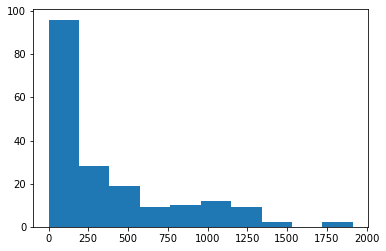

In [45]:
plt.hist(covidtest_df['Deaths per 1M pop'])
plt.show()

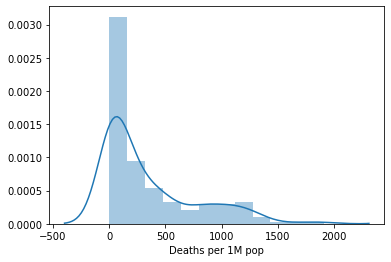

In [46]:
ax = sns.distplot(covidtest_df['Deaths per 1M pop'])

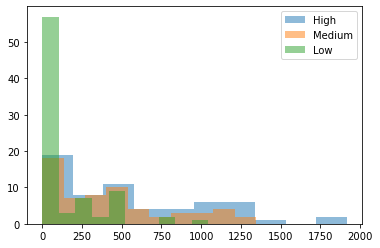

In [47]:
plt.hist(H_test['Deaths per 1M pop'], alpha = .5, label = "High")
plt.hist(M_test['Deaths per 1M pop'], alpha = .5, label = "Medium")
plt.hist(L_test['Deaths per 1M pop'], alpha = .5, label = "Low")
plt.legend(loc="upper right")
plt.show()

In [48]:
print(stats.describe(H_test['Deaths per 1M pop']))
print(stats.describe(M_test['Deaths per 1M pop']))
print(stats.describe(L_test['Deaths per 1M pop']))

DescribeResult(nobs=61, minmax=(1.0, 1914.0), mean=554.5573770491803, variance=235644.8508196721, skewness=0.8154267025213013, kurtosis=-0.23031313534159725)
DescribeResult(nobs=61, minmax=(0.6, 1345.0), mean=423.52857142857135, variance=143531.90190476188, skewness=0.8484500174660172, kurtosis=-0.3601419275981024)
DescribeResult(nobs=81, minmax=(0.2, 1046.0), mean=134.64814814814815, variance=42113.09534920635, skewness=2.2220254534944455, kurtosis=5.33775273848898)


# Skewness and Kurtosis Test
I will have to run a non-parametric test. I decided to run a Kruskal-Wallis test because it is quite skewed and I am working with three variables

In [49]:
print(stats.kruskal(H_test['Deaths per 1M pop'], M_test['Deaths per 1M pop'], L_test['Deaths per 1M pop']))

KruskalResult(statistic=51.62456958685288, pvalue=6.164064137026368e-12)


In [50]:
print(stats.mannwhitneyu(x=H_test['Deaths per 1M pop'], y=L_test['Deaths per 1M pop']))
print(stats.mannwhitneyu(x=H_test['Deaths per 1M pop'], y=M_test['Deaths per 1M pop']))
print(stats.mannwhitneyu(x=M_test['Deaths per 1M pop'], y=L_test['Deaths per 1M pop']))

MannwhitneyuResult(statistic=884.5, pvalue=3.187761115398622e-11)
MannwhitneyuResult(statistic=1595.5, pvalue=0.08780196092065667)
MannwhitneyuResult(statistic=1155.5, pvalue=3.016145066573074e-08)


# Results 

Based on the Kruskal-Wallis test, the p-value (1.345e-10) obtained is below Alpha value 0.05, so the null hypothesis can be rejected, where at least one group’s death rate is significantly different compare the others. I then run Mann-Whitney tests to compare each two groups, to see if any significant difference can be identified between High level/Low Level testing, High level/Medium level testing, and Medium level/Low level testing. Based on the p-values obtained, it seems that the L level testing group death rate is significant different comparing to High and Medium level testing countries, although no significant difference identified between High level and Medium level testing countries.

# DISCUSSION/CONCLUSION

Based on the analysis, the significant difference of death rate between Low level testing against Medium and High level testing countries seems to indicate a much lower death rate in low level testing countries, which is quite surprising. However, this could due to the significant under reporting of death rate in those low level testing countries. Therefore, to reduce the variation between different countries reporting strategies, further detail analysis has been conducted specifically for data in the US across different states.